# Classification of Faces

In this excercise, we try to classify images of : "Miranda_Cosgrove" "Chris_Martin" "Emma_Stone" "Jamie_Foxx" "Steve_Jobs" "Zac_Efron" "Sandra_Oh" "Taryn_Manning". The data is from a random sample of 8 persons of the OXFORD VGG Face dataset, more information here: http://www.robots.ox.ac.uk/~vgg/data/vgg_face/.

## Downloading of Data

You can download the data using the following code:

In [2]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [3]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)
import urllib
import os
if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")
!ls -l 8_faces_train_and_valid.hdf5

-rw-r--r--  1 vasy  staff  132733792 Jan 12 17:00 8_faces_train_and_valid.hdf5


In [4]:
import h5py
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'].value
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'].value
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'].value
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'].value
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250


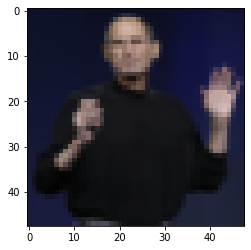

In [5]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [6]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")
h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'].value
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'].value
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [7]:
np.min(X_train),np.max(X_train),np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

## a) Training an CNN from scratch

Train a model (as shown below) from scratch, using the training data for training and the validation data for validation. For all activations in the hidden layer use the 'ReLU', for the last layer use softmax. Use 3x3 convolutions and use padding = same.

* Plot the learning curves: (epochs vs training loss and validation loss) and epochs vs accuracy. 
* Calculate the accuracy on the test set (you should reach an accuracy of about 0.54)
* Calculate the confusion matrix
* Have a look at missclassified examples

Image of the network:
https://github.com/ioskn/mldl_htwg/blob/master/uebungen/dl_cnn_faces_net.png

In [8]:
model = Sequential()#add model layers
model.add(Conv2D(15, kernel_size=3, activation="relu", padding='same', input_shape=(48,48,3)))
#model.add(Activation('relu'))
model.add(Conv2D(15, kernel_size=3, activation="relu", padding='same', input_shape=(48,48,3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=2, padding='same'))
model.add(Conv2D(30, kernel_size=3, activation="relu", padding='same', input_shape=(24,24,3)))
#model.add(Activation('relu'))
model.add(Conv2D(30, kernel_size=3, activation="relu", padding='same', input_shape=(24,24,3)))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=4, padding='same'))
model.add(Flatten())
model.add(Dense(300, activation="relu"))
#model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation="softmax"))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
#need extra activation layer???

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 30)        8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1080)              0

In [9]:
from keras.utils import to_categorical

history = model.fit(X_train, to_categorical(Y_train), validation_data=(X_valid, to_categorical(Y_valid)), epochs=15)

Epoch 1/15
63/63 [==============================] - 7s 112ms/step - loss: 1.9725 - accuracy: 0.2210 - val_loss: 1.8359 - val_accuracy: 0.2725
Epoch 2/15
63/63 [==============================] - 7s 105ms/step - loss: 1.6578 - accuracy: 0.4060 - val_loss: 1.5743 - val_accuracy: 0.4350
Epoch 3/15
63/63 [==============================] - 7s 106ms/step - loss: 1.3819 - accuracy: 0.5055 - val_loss: 1.3787 - val_accuracy: 0.4900
Epoch 4/15
63/63 [==============================] - 7s 109ms/step - loss: 1.1746 - accuracy: 0.5810 - val_loss: 1.2550 - val_accuracy: 0.5350
Epoch 5/15
63/63 [==============================] - 7s 107ms/step - loss: 1.0117 - accuracy: 0.6420 - val_loss: 1.2117 - val_accuracy: 0.5500
Epoch 6/15
63/63 [==============================] - 7s 106ms/step - loss: 0.8244 - accuracy: 0.7050 - val_loss: 1.1386 - val_accuracy: 0.6225
Epoch 7/15
63/63 [==============================] - 7s 106ms/step - loss: 0.7288 - accuracy: 0.7335 - val_loss: 1.2370 - val_accuracy: 0.5775
Epoch 

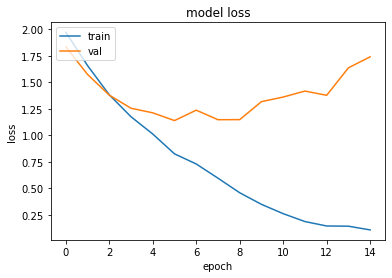

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

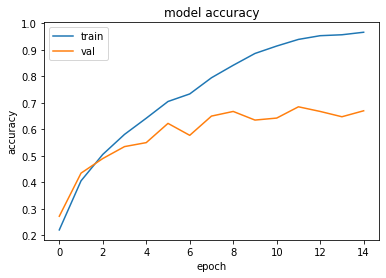

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()

for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

In [13]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,Y_test)

print('Accuracy is:', a*100)

Accuracy is: 67.25


Confusion Matrix

In [14]:
y_pred2=model.predict_classes(X_test)
con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=y_pred2).numpy()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [15]:
import pandas as pd
classes = np.arange(8)
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
 
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

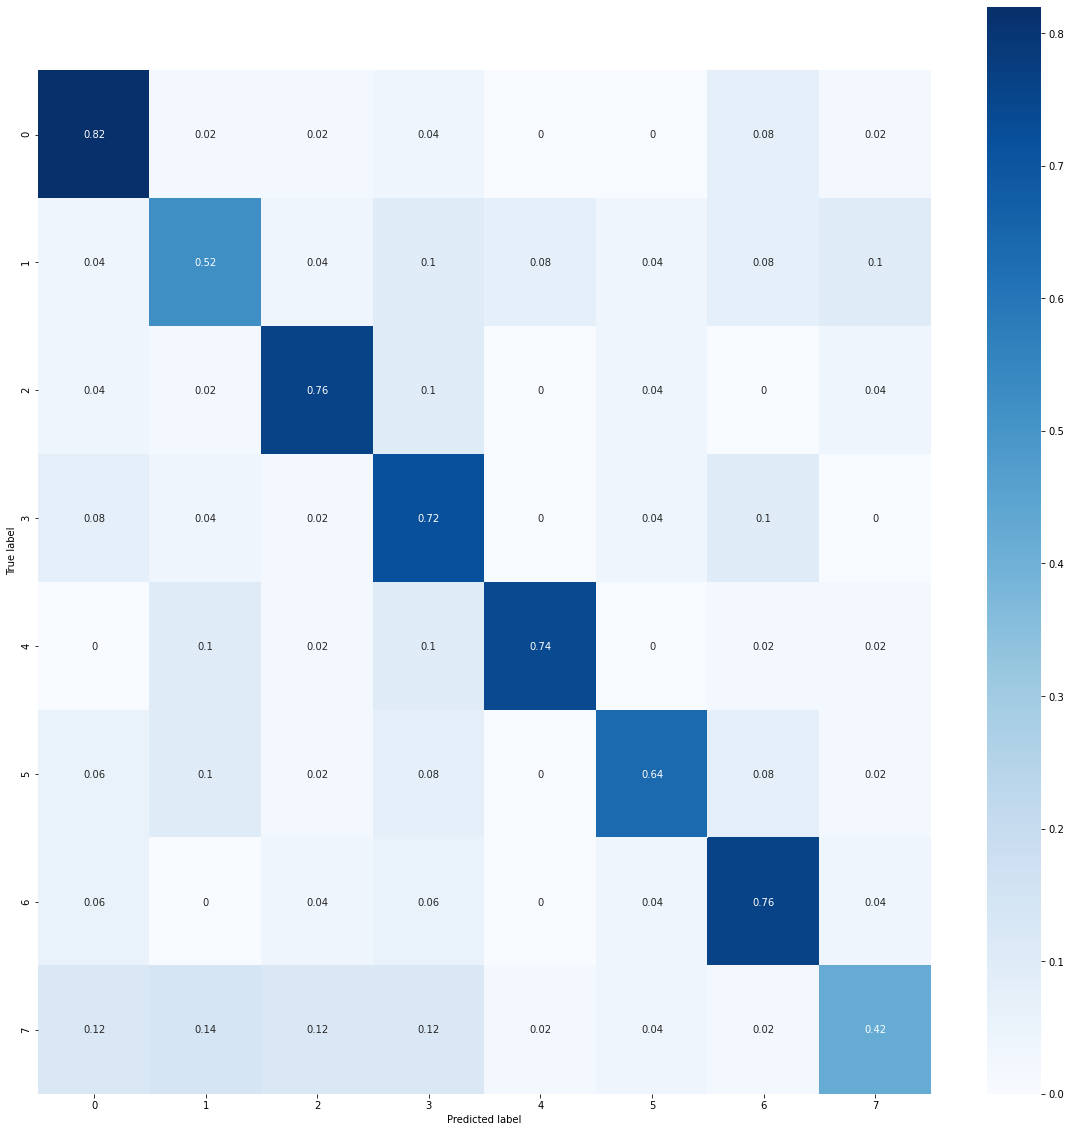

In [16]:
import seaborn as sns
figure = plt.figure(figsize=(20, 20))
ax = figure.add_subplot(111)
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
ax.set_ylim(8, -0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Look at misclassified examples

In [17]:
testing = np.array(list(zip(y_pred2,Y_test)))

Predicted: 5, Right: 1
Predicted: 4, Right: 1


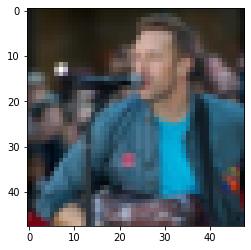

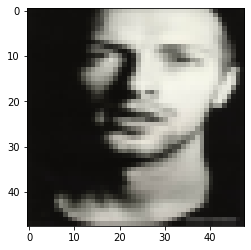

In [18]:
testlist = []

for element in testing:
    testlist.append(element[0] == element[1])

count = 0
for index, element in enumerate(testlist):
    if element == False:
        plt.figure()
        plt.imshow(X_test[index])
        print(f'Predicted: {y_pred2[index]}, Right: {Y_test[index]}')
        count+=1
    if count >= 2:
        break


## b) Training using transfer learning
In transfer learning you use an existing trained model with given weights trained on a different task. You then add a few layers yourself and only train them. The model you add should look like:

```
my_dense1 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense2 (Dense)            (None, 512)               262656    
_________________________________________________________________
my_dense3 (Dense)            (None, 100)               51300     
_________________________________________________________________
my_dense4 (Dense)            (None, 8)                 808       
```

Use the following code as a starting point:

In [19]:
from tensorflow.keras.applications import VGG16
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False,input_shape = (img_width, img_height, 3))

In [20]:
fc1 = base_model.output
fc1 = Flatten()(fc1)
#...
fc1 = Dense(512, activation="relu", name='my_dense1')(fc1)
fc1 = Dense(512, activation="relu", name='my_dense2')(fc1)
fc1 = Dense(100, activation="relu", name='my_dense3')(fc1)
#...
fc1 = Dense(8,activation='softmax', name='my_dense4')(fc1)
model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
#model_trans.summary()

In [21]:
#base_model.summary()
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [22]:
model_trans.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model_trans.fit(X_train, to_categorical(Y_train), validation_data=(X_valid, to_categorical(Y_valid)), epochs=15)

Epoch 1/15
63/63 [==============================] - 38s 603ms/step - loss: 1.7537 - accuracy: 0.3365 - val_loss: 1.4702 - val_accuracy: 0.5000
Epoch 2/15
63/63 [==============================] - 38s 607ms/step - loss: 1.3338 - accuracy: 0.5240 - val_loss: 1.3765 - val_accuracy: 0.4775
Epoch 3/15
63/63 [==============================] - 37s 595ms/step - loss: 1.0881 - accuracy: 0.6035 - val_loss: 1.2901 - val_accuracy: 0.5550
Epoch 4/15
63/63 [==============================] - 36s 577ms/step - loss: 0.8720 - accuracy: 0.6940 - val_loss: 1.2545 - val_accuracy: 0.5300
Epoch 5/15
63/63 [==============================] - 37s 586ms/step - loss: 0.7211 - accuracy: 0.7510 - val_loss: 1.3062 - val_accuracy: 0.5600
Epoch 6/15
63/63 [==============================] - 38s 597ms/step - loss: 0.5406 - accuracy: 0.8120 - val_loss: 1.3208 - val_accuracy: 0.5725
Epoch 7/15
63/63 [==============================] - 37s 584ms/step - loss: 0.4298 - accuracy: 0.8480 - val_loss: 1.4983 - val_accuracy: 0.5725

Do the same analysis as in a) above. You should get an accuracy of approx 0.61

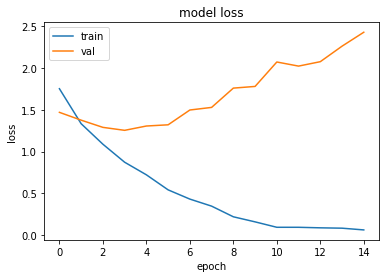

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## c) Try to get better.

Ideas: use dropout and other tricks to prevent overfitting. Try to learn some convulutional layers as well.

In [25]:
from keras import optimizers
model = Sequential()#add model layers
model.add(Conv2D(15, kernel_size=3, activation="relu", padding='same', input_shape=(48,48,3)))
model.add(Activation('relu'))
model.add(Conv2D(15, kernel_size=3, activation="relu", padding='same', input_shape=(48,48,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=2, padding='same'))
#model.add(Dropout(0.2))
model.add(Conv2D(30, kernel_size=3, activation="relu", padding='same', input_shape=(24,24,3)))
model.add(Activation('relu'))
model.add(Conv2D(30, kernel_size=3, activation="relu", padding='same', input_shape=(24,24,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4), strides=4, padding='same'))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(300, activation="relu"))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation="softmax"))

optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
#need extra activation layer???
#why crossentropy with softmax

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 48, 48, 15)        420       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 30)       

In [26]:
#Batch-Size vs Batch-Size Backpropagation bei Aufgabe

from keras.utils import to_categorical

history = model.fit(X_train, to_categorical(Y_train), validation_data=(X_valid, to_categorical(Y_valid)), batch_size=128, epochs=15)

Epoch 1/15
16/16 [==============================] - 5s 318ms/step - loss: 2.0508 - accuracy: 0.1720 - val_loss: 2.0075 - val_accuracy: 0.2425
Epoch 2/15
16/16 [==============================] - 5s 307ms/step - loss: 1.9270 - accuracy: 0.2705 - val_loss: 1.8537 - val_accuracy: 0.3250
Epoch 3/15
16/16 [==============================] - 5s 306ms/step - loss: 1.7719 - accuracy: 0.3340 - val_loss: 1.7588 - val_accuracy: 0.3875
Epoch 4/15
16/16 [==============================] - 5s 307ms/step - loss: 1.6770 - accuracy: 0.3780 - val_loss: 1.6825 - val_accuracy: 0.3975
Epoch 5/15
16/16 [==============================] - 5s 308ms/step - loss: 1.5686 - accuracy: 0.4370 - val_loss: 1.5923 - val_accuracy: 0.4325
Epoch 6/15
16/16 [==============================] - 5s 308ms/step - loss: 1.4966 - accuracy: 0.4585 - val_loss: 1.5442 - val_accuracy: 0.4400
Epoch 7/15
16/16 [==============================] - 5s 306ms/step - loss: 1.3966 - accuracy: 0.4975 - val_loss: 1.4788 - val_accuracy: 0.4550
Epoch 

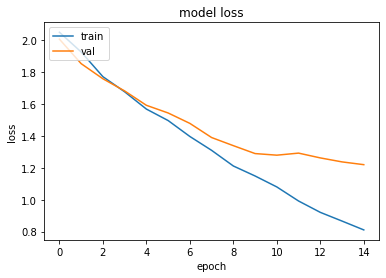

In [27]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()

for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

from sklearn.metrics import accuracy_score
a = accuracy_score(pred,Y_test)

print('Accuracy is:', a*100)

Accuracy is: 62.74999999999999
